# Example Notebook for SeaDataNet Climatology data
Author(s): [Bjorn Backeberg](mailto:backeb@gmail.com) (backeb) <br> 
Creation date: 01-Aug-2019 <br>
Last updated:  01-Aug-2019 <br>

---

## Purpose
1. Load SeaDataNet Climatology computed from the SeaDataNet V1.1 aggregated regional datasets. Data can be downloaded [here](https://www.seadatanet.org/Products#/search?from=1&to=20)
2. Plot on map using cartopy

### Import necessary libraries

In [52]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt 

### Load dataset as a dataframe

In [16]:
# open dataset for nearest user defined location
ds = xr.open_dataset('data/SDN_Clim_BalticSea_Temperature.nc')

# display some of the metadata
print(ds)

<xarray.Dataset>
Dimensions:                 (depth: 21, lat: 200, lon: 200, nv: 2, observations: 1010155, time: 12)
Coordinates:
  * lon                     (lon) float32 9.0 9.11 9.22 ... 30.67 30.78 30.89
  * lat                     (lat) float32 53.0 53.065 53.13 ... 65.87 65.935
  * depth                   (depth) float32 300.0 275.0 250.0 ... 10.0 5.0 0.0
  * time                    (time) datetime64[ns] 1956-01-16 ... 1956-12-16
    obslon                  (observations) float64 ...
    obslat                  (observations) float64 ...
    obsdepth                (observations) float64 ...
    obstime                 (observations) datetime64[ns] ...
Dimensions without coordinates: nv, observations
Data variables:
    climatology_bounds      (time, nv) float32 ...
    CORRLEN                 (time, depth) float32 ...
    SNR                     (time, depth) float32 ...
    VARBACK                 (time, depth) float32 ...
    Temperature             (time, depth, lat, lon) flo

In [22]:
# load the data into variables for plotting
lon = ds.lon.values
lat = ds.lat.values
depth = ds.depth.values
time = ds.time.values
temperature = ds.Temperature.values

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [59]:
len(depth)

21

### Plot on map using cartopy

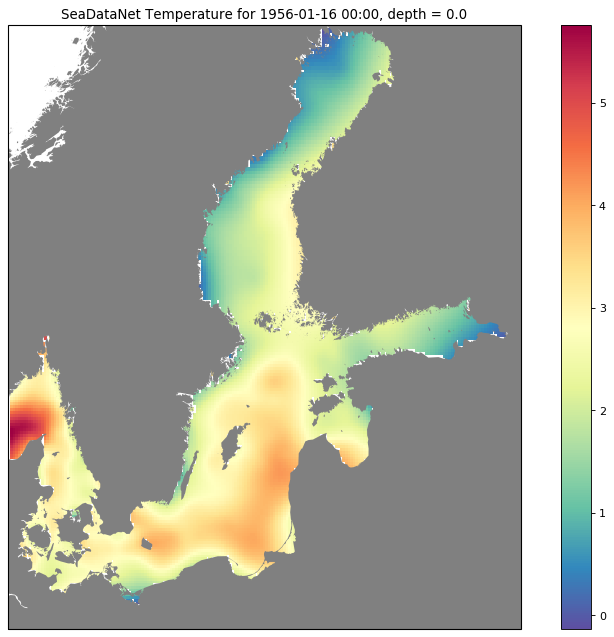

In [65]:
tm = 0 # set time to plot
dp = 20 # set depth to plot

# instantiate the figure
fig = plt.figure(figsize = (13, 10), dpi = 80) 

# here we do all the cartopy stuff
ax = plt.axes(projection=ccrs.Mercator(central_longitude = np.median(lon).round()))
# Set the map extent, making sure to specify the correct coordinate system
# for geographical coordinates:
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# plot
cm = ax.pcolormesh(lon, lat, temperature[tm,dp,:,:], 
              shading = 'gourand', 
              cmap = plt.cm.Spectral_r, 
              transform = ccrs.PlateCarree())

plt.colorbar(cm, orientation = 'vertical')

# add a coastline
coastline = cfeature.GSHHSFeature(scale = 'intermediate', edgecolor = 'none', facecolor = 'grey')
ax.add_feature(coastline)

# add a title
plt.title("SeaDataNet Temperature for "
          +str((pd.to_datetime(time[tm])).strftime('%Y-%m-%d %H:%M'))
          +", depth = "+str(depth[dp]))

plt.show()

# Exercises
You have the following data from SeaDataNet in your folders:
* SDN_Clim_Arctic_Salinity.nc
* SDN_Clim_Arctic_Temperature.nc
* SDN_Clim_BalticSea_Salinity.nc
* SDN_Clim_BalticSea_Temperature.nc
* SDN_Clim_BlackSea_Salinity.nc
* SDN_Clim_BlackSea_Temperature.nc
You have just plotted 

In [66]:
ls

01-ERA5_reanalysis_example.ipynb        README.md
02-SeaDataNet_example.ipynb             data/
CHANGELOG.md                            todo-GFS_real_time_winds_example.ipynb


In [68]:
ls data/SDN*

data/SDN_Clim_Arctic_Salinity.nc        data/SDN_Clim_BalticSea_Temperature.nc*
data/SDN_Clim_Arctic_Temperature.nc     data/SDN_Clim_BlackSea_Salinity.nc*
data/SDN_Clim_BalticSea_Salinity.nc*    data/SDN_Clim_BlackSea_Temperature.nc*
